In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import pickle
from pathlib import Path

In [4]:
def saveDict(dictionary,filename):
    """
    Saves dictionary to pickle file in working directory.
    
    Parameters
    ----------
    dictionary: dict
    filename: str
        filename without .pkl ending
    
    Returns
    -------
    Nothing
    """
    f = open(f"{filename}.pkl","wb")
    pickle.dump(dictionary,f)
    f.close()

def openDict(filename):
    """
    Opens dictionary from pickle file in working directory.
    
    Parameters
    ----------
    filename: str
        filename without .pkl ending
    
    Returns
    -------
    dictionary
    """
    pickle_in = open(f"{filename}.pkl","rb")
    loadedDict = pickle.load(pickle_in)
    return loadedDict

def findFiles(variable="_",region="_",MA="day",years="year",head="trend",resultDir="Results"):
    """
    Finds .npy-files for a specific variable and moving average smoothing (MA) in a directory.
    
    Parameters
    ----------
    variable: str
    MA: str
    
    Returns
    -------
    list of files
    """
    # set folder
    folder = Path(resultDir)
    
    # make list of strings
    files = []
    for item in sorted(folder.glob(f"*{head}*{variable}*{region}*{MA}*{years}*.npy")):
        files.append(str(item))
    
    return files

True

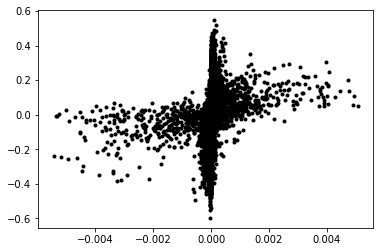

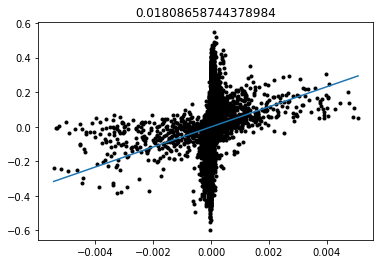

In [101]:
variables = ("streamflow","snowmelt","rainfall","temperature")
region = ("finn","nord","trond","vest","ost","sor")
allStream = []
allSnow = []
for reg in region:
    test = {}
    for var in variables:
        file = findFiles(variable=var,region=reg,MA="10",years="30",head="Mag")[0]
        test[var] = np.load(file)

    snow = test["snowmelt"] + test["rainfall"]
    rain = test["rainfall"]
    stream = test["streamflow"]

    N = snow.shape[0]
    correlations = []
    for c in range(N):
        x = list(stream[c,:])
        y = list(snow[c,:])
        correlations.append(stats.pearsonr(x,y))
        allStream = allStream + x
        allSnow = allSnow + y
    corr = np.array(correlations)
    p = corr[:,1]
    r = corr[:,0]
    mask = np.where(p<0.005)[0]

    for c in range(N):
        plt.plot(stream[c,:],snow[c,:],"k.")

allStream = np.array(allStream)
allSnow = np.array(allSnow)

plt.figure()
plt.plot(allStream,allSnow,"k.")
reg = stats.linregress(allStream,allSnow)
x = np.linspace(allStream.min(),allStream.max())
plt.plot(x,reg.slope*x+reg.intercept)
plt.title(reg.rvalue**2)
reg.pvalue<0.01